# Wikipedia Fighting Games Research Paper

# Introduction
This document aims to examine the Wikipedia "List of fighting games" page.

The goal is to discover trends, patterns and interesting trivia in this list. Although rudimentary-seeming, data on titles, their naming, publishers and subgenres can be incorporated into a structured study of trends in the genre.

# Guide
This paper is organised into several parts:
- Motivations - Personal reasons for creating this paper. <i>(Optional to read)</i>
- Goals and Objectives - Establishing clear expectations for the paper.
- The Dataset - Any information regarding the dataset, how and why it was obtained, etc.
    - Extracting the Dataset - code and explanations on dataset Extraction
        - Game Entries - the production of the array for all game entries
        - Publisher Entries - the production of the publishers dictionary
        - Series - The production of the series dictionary
- Data Analysis - Describes how and why data will be analysed.
    - Naming Conventions
    - Publisher Relevance
    - Series Entries
- Feedback and Reflection - Notes of the Author on their work
    - Positives
    - Negatives
    - Overall

# Motivations <i>(Optional to read)</i>

Fighting games have been an inseparable part of my life ever since I bought and built my first gaming PC and bought my first arcade stick with my first salary. Simply put, they are just plain fun. Not so simply put:

Fighting games are a subgenre where each title takes incredible skill to execute both from the developers (one of the hardest genres for gameplay programmers and game designers by far) and the players. Fighting games are the earliest form of eSports with some of the earliest gaming tournaments being dedicated to Street Fighter 2. Street Fighter 2 was instrumental in cementing that genre. It combined the twitch reflexes of action games, mixed that with classified specialist characters (shoto, rushdown, grappler, zoner) which can definitely be inspired by RPGs, and finally added the element of mind games, seen in traditional sports and games, of playing against another human. It is a perfect formula that keeps being refined and sometimes reinvented.

Personally, I thought I would never be good at them. I was right. I am still pretty bad. But I am definitely much better than what I thought I would be. I discovered a passion for these games, people who make them, people who play them and their history. Getting good, spacing, mind games, neutral, frame data - these are the fundamentals that actually make this video game genre qualify for a sport in my opinion. Mixing in physical execution of commands with tactics and strategy turns this into a quick chess game at the highest level.

This genre is still relevant. However, its flaw is is - player retention. While big series like Tekken and Street Fighter sell copies in the millions, it is only some ten, if lucky, 20 thousand players that stay the first year of the lifespan of the game. With the numbers dwindling during the years. Casual players blaming the barrier of entry (the skill floor) being too high, while hardcore players giving the exact opposite reason - a lowered barrier of expression (the skill ceiling). 

I want to see what trends could be discovered in all fighting games indexed in this WikiPedia list. Which titles dominate in numbers, what naming conventions are most common, which studios produce the most games? The aim of this is not to fix the underlying issues of the genre, I am not the person capable of doing that. The aim is to notice trends and draw insights for entertainment value from something that I appreciate.

# Goals and Objectives
<b>Guide:</b>
- <b>Goal</b> - <i>a large milestone for the project</i>
  - <b>objective</b> - <i>a smaller milestone that leads to completing that goal</i>

<b>Goals and Objectives:</b>
- <b>Develop a working dataset</b>
  - Provide webpage source and definition
  - Provide details on the dataset (necessary for setting up clear expectations)
  - Describe the extraction method (language, libraries and reasons for using them)
  - Establish required fields from that data and reasons for them
- <b>Parse extracted data</b>
    - Create objects that hold relevant values
    - Test for accuracy and quality
    - <i><b>If tests are unsatisfactory:</b></i>
        - Develop a validation system that would remove "junk" data such as unwanted characters in strings, etc.
        - Test again
        - Repeat until satisfaction (each test is documented in the paper to display the working process)
    - When tests are satisfactory, move on to the next goal
- <b>Build statistics</b>
    - <i><b>For each statistic:</b></i>
        - Provide definition
        - Provide reasoning for creating it
        - Provide reasoning for the output method (i.e. "Why pie chart?", "Why bar chart?", etc.)
        - Code the process (this has its own unique implementations with descriptions)
        - Report findings
    - <i><b>Statistics list:</b></i>
        - Most frequent naming conventions
        - Most published studios
        - Most series entries
- <b>Abstract:</b>
    - Summarise findings for each statistic

# The Dataset
The dataset is drawn from the "List of fighting games" Wikipedia article
- <b>Type:</b> list of lists (2D array)
- <b>Sorted:</b> Yes
    - <b>If yes, sort order:</b> A set of unsorted lists sorted in various categories with some repetitions.
- <b>Traits of dataset:</b> Dynamically updated
- <b>Ethics:</b> The dataset is ethically sourced as nowhere in the wikipedia robots.txt is web-scraping disallowed. However, web-scraping that involves bots issuing too many requests at once is forbidden. Therefore, I will do my best in ethically sourcing the data as not to violate any guidelines. For more information, please refer to the official source: https://en.wikipedia.org/robots.txt
- <b>Method of acquisition:</b> Web-scraping script using Python with requests library and Beautiful Soup 4
    - <b>Reason:</b> It is most familiar and furthermore gives more control than downloading an API
- <b>Why Wikipedia:</b>
    - User-run and user-moderated.
    - Largest user-run wiki. Therefore moderation is more quality as well.
    - Other websites with indexes of titles such as Metacritic impose strict TOS bans on any type of web-scraping for commercial and for non-commercial use. I prefer to give my traffic to websites which believe that data should be free.
    - The amount of data on this webpage includes many domestic releases (mainly in Japan) which are not indexed on websites such as Metacritic.
- <b>Source:</b> https://en.wikipedia.org/wiki/List_of_fighting_games

# Extracting the Dataset: Game Entries

In [1]:
#importing requests to retrieve data from website and BS4 for scraping data
import requests
from bs4 import BeautifulSoup

#test code to see if connection is established
url = "https://en.wikipedia.org/wiki/List_of_fighting_games"
res = requests.get(url)

#Remove comment for testing purposes
#print(res.text)

In [2]:
#load into BS4 obj
soup = BeautifulSoup(res.text,'lxml')

#test code to demonstrate soup is working
#Remove comment for testing purposes
#print(soup.prettify())

In [3]:
#Isolate Tags, the tag for each entry is <i>
entryTags = soup.find_all('i')

#Print all text in entry tags, we do this to see what input cleaning we need to do
#Remove comment for testing purposes
#for tag in entryTags:
    #print(tag.text)

In [4]:
#We will need a list of all entries, therefore we will store it into an array
allEntries = []
for tag in entryTags:
    allEntries.append(tag.text)
    #Remove comment for testing purposes
    #print(allEntries[len(allEntries)-1])

In [5]:
#Now to clean up the allEntries array
#NOTE: If you find yourself running this cell more than once it will impact the entries array. Please restart Kernel

#the first three elements are unneeded
allEntries.pop(0)
allEntries.pop(0)
allEntries.pop(0)

' (Learn how and when to remove this template message)'

In [6]:
#test if entries list free of junk data
#Remove comment for testing purposes
#print(allEntries)

# Extracting the Dataset: Game Entries 1.1

All games entries are successfuly extracted. However, this list has some problems. While all titles look to be on point there are several repetitions. This makes sense as there are several sub-lists on this page that re-use titles. Repeating entries can easily sway data analysis.

In [7]:
#removing repetitions method: Using a dictionary.
#Each key is a representative of each title. If a key is repeated, it will simply not be added to the dictionary
#Finally, a list is created with elements being all dictionary keys.

#Demonstration Code, Remove Comments for testing purposes
# foo = ["one","one","one","two", "three","two"]
# foo = list(dict.fromkeys(foo))
# print(foo)
# #Expected output:['one', 'two', 'three']


In [8]:
#Implementation for our list
#Remove Comments for testing purposes
#print(len(allEntries))
allEntries = list(dict.fromkeys(allEntries))
#print(len(allEntries))

# Extracting the Dataset: Publisher Entries

After extracting all game entries, a list of publisher entries is needed before conducting analysis
The goal is to extract that data and see if any junk data should be cleaned

In [9]:
#example of publisher entry in HTML:
#<td style = "text-align: left; vertical-align: top;">
#    <a href="/wiki/Bandai_Namco" class="mw-redirect" title="Bandai Namco">Bandai Namco</a>
#Goal is to extract text data with that tag and class into a list and see if resulting list is satisfactory
#publisherTags = soup.find_all("a", class_ = "mw-redirect")
publishers = []
for cell in soup.find_all("td",{"style":"text-align: left; vertical-align: top;"}):
    for attribute in cell.find_all("a"):
        publishers.append(attribute.text)
#Remove Comments for testing purposes
#print(publishers)

In [10]:
#The resulting array is not satisfactory to what is needed. Way too much junk data
#this will clean up any game entries in the publishers list

#Remove Comments for testing purposes
#print(len(publishers))
i = 0
while i < len(publishers):
    if publishers[i] in allEntries:
        print("Found and removed " + publishers.pop(i) + " from publishers list.")
        i=0
    i+=1

#Remove Comments for testing purposes
#print(len(publishers))
#print(publishers)

Found and removed Aggressors of Dark Kombat from publishers list.
Found and removed Tōkidenshō Angel Eyes from publishers list.
Found and removed Akatsuki EN-Eins from publishers list.
Found and removed Aquapazza: Aquaplus Dream Match from publishers list.
Found and removed Arcana Heart from publishers list.
Found and removed Arcana Heart 2 from publishers list.
Found and removed Arcana Heart 3 from publishers list.
Found and removed Art of Fighting from publishers list.
Found and removed Astra Superstars from publishers list.
Found and removed Avengers in Galactic Storm from publishers list.
Found and removed Battle Blaze from publishers list.
Found and removed Battle Beast from publishers list.
Found and removed Battle K-Road from publishers list.
Found and removed Battle Monsters from publishers list.
Found and removed Barbarian from publishers list.
Found and removed Barbarian: The Ultimate Warrior / Death Sword from publishers list.
Found and removed Barbarian II: The Dungeon of D

Found and removed Naruto Shippuden: Ultimate Ninja Storm 2 from publishers list.
Found and removed Naruto Shippuden: Ultimate Ninja Storm Generations from publishers list.
Found and removed Naruto Shippuden: Ultimate Ninja Storm 3 from publishers list.
Found and removed Naruto Shippuden: Ultimate Ninja Storm Revolution from publishers list.
Found and removed Naruto Shippuden: Ultimate Ninja Storm 4 from publishers list.
Found and removed One Must Fall: Battlegrounds from publishers list.
Found and removed One Piece from publishers list.
Found and removed One-Punch Man: A Hero Nobody Knows from publishers list.
Found and removed Pokkén Tournament from publishers list.
Found and removed Barbarian from publishers list.
Found and removed Battle Blaze from publishers list.
Found and removed Blade Arcus from Shining from publishers list.
Found and removed Blandia from publishers list.
Found and removed BlazBlue from publishers list.
Found and removed BlazBlue: Cross Tag Battle from publisher

Found and removed Boxing from publishers list.
Found and removed Boxing from publishers list.
Found and removed Boxing Angel from publishers list.
Found and removed Boxing Fever from publishers list.
Found and removed Boxing Legends of the Ring from publishers list.
Found and removed Black & Bruised from publishers list.
Found and removed By Fair Means or Foul / Pro Boxing Simulator from publishers list.
Found and removed Canimals Boxing Championship from publishers list.
Found and removed Def Jam: Icon from publishers list.
Found and removed Devastating Blow from publishers list.
Found and removed Evander "Real Deal" Holyfield's Boxing from publishers list.
Found and removed FaceBreaker from publishers list.
Found and removed Final Blow from publishers list.
Found and removed Fight Night from publishers list.
Found and removed Fight Night from publishers list.
Found and removed Fight Night 2004 from publishers list.
Found and removed Fight Night Round 2 from publishers list.
Found and

Found and removed Guilty Gear Xrd from publishers list.
Found and removed Guilty Gear -Strive- from publishers list.
Found and removed One Piece: Grand Battle! from publishers list.
Found and removed One Piece: Gear Spirit from publishers list.
Found and removed Tatsunoko vs. Capcom from publishers list.
Found and removed Dead or Alive (franchise) from publishers list.
Found and removed Demon Slayer: Kimetsu no Yaiba – The Hinokami Chronicles from publishers list.
Found and removed Dragon Ball GT: Final Bout from publishers list.
Found and removed Dragon Ball Z: Budokai (series) from publishers list.
Found and removed Dragon Ball Z: Budokai Tenkaichi (series) from publishers list.
Found and removed Dragon Ball Z: Burst Limit from publishers list.
Found and removed Dragon Ball Z: Infinite World from publishers list.
Found and removed Dragon Ball: Raging Blast from publishers list.
Found and removed Dragon Ball: Raging Blast 2 from publishers list.
Found and removed Dragon Ball Xenoverse

# Extracting the Dataset: Publisher Entries 1.1

An issue has arisen, publisher data includes great amounts of unnecessary data. Manual cleaning is unnecessary as the list has roughly 260 elements. In this case, my solution is to generate a dictionary of all publishing companies as keys and compare them to the publishers array. For each mention of the key, the dictionary entry value will be updated +1

Chose the following for reasons:
- Bandai - one of the biggest publishers
- SNK - Used to be the 2nd biggest publisher, sole publisher of all KOF & Fatal Fury games
- Capcom - Used to be the biggest publisher, still a big name
- Konami - another big name in the genre
- EA - biggest sports fighting game publisher
- Spike - Massive company that published a large number of titles. They would finance many projects including fighting games and a large roster of the pro-wrestling subgenre 
- Ubisoft - massive company, responsible for a few alternative fighters such as "For Honor"
- Midway - Big publisher responsible for Mortal Kombat series
- NetherRealm - NetherRealm studios is the spiritual successor to Midway
- Nintendo - same as Bandai. Furthermore, they used to be the (almost) sole publisher of games on their own consoles during the 90's
- Sega - same as Nintendo, although they do not make consoles anymore, they are still active developers
- Warner - giant company, published many fighting games including Midway projects
- Arc - Arc System Works - biggest anime fighter publisher
- Type-Moon - big publisher with many fighting games under their belt, famous for the Melty Blood series and Fate series 
- CyberConnect2 - biggest arena figher publisher
- Human - Massive third-party publisher during the 80's and 90's

In [11]:
#Sticking to one word in order to count variations i.e. "EA Chicago", "EA Canada"
publisherDict = {
    "Bandai": 0, 
    "SNK":0, 
    "Capcom":0, 
    "Konami":0,
    "EA":0,
    "Spike":0,
    "Ubisoft":0,
    "Midway":0,
    "NetherRealm":0,
    "Nintendo":0, 
    "Sega":0,
    "Warner": 0, 
    "Arc": 0, 
    "Type-Moon":0,
    "CyberConnect2":0,
    "Human": 0,
    "Others": 0 }

for entry in publishers:
    #create list from entry. 
    #Example: entry = "a b c"; entryList = ["a", "b", "c"]
    entryToList = entry.split(' ')
    keyFound = False
    for key in publisherDict.keys():
        if key in entryToList:
            publisherDict[key]+=1
            keyFound = True
    if keyFound == False:
        publisherDict["Others"]+=1

#Remove Comments for testing purposes
#print(publisherDict)

# Extracting the Dataset: Series
This section will focus on creating a dictionary to count each entry of the most popular series.
For this the allEntries list will be used in conjuction with a dictionary.

Each time the term "series" is mentioned, the series name (without series) will be added into the dictionary with a value of 0. If the series named is mentioned again - the value will be incremented by 1. 

Dictionary will have some default series manually added.

In [12]:
#init series dict
seriesDict = {
    "Street Fighter": 0,
    "Mortal Kombat": 0,
    "Persona": 0,
    "Guilty Gear": 0,
    "BlazBlue": 0,
    "Dragon Ball": 0,
    "Naruto": 0,
    "Fight Night": 0,
    "WWE": 0,
    "WWF": 0,
    "WCW": 0,
    "Fire Pro Wrestling": 0,
    "Tekken": 0
}

#loop through all entries
for entry in allEntries:
    #split entry into string list and look for mention of "series"
    entryToList = entry.split(' ')
    if "series" in entryToList:
        entryToList.remove("series") 
        key = " ".join(entryToList)#i.e. ["a", "game"] => "a game"
        if (key in seriesDict.keys()) == False:
            seriesDict[key] = 0
    #Count each mention if "series" not in entry
    else:
        for key in seriesDict.keys():
            if key in entry:
                seriesDict[key]+=1
            
    
#Remove Comments for testing purposes
#print(seriesDict)

# Data Analysis

This is the beginning of the data analysis process. It will cover ways of presenting data and formatting it where necesary.

# Data Analysis - Naming Conventions - Formatting Data

This section will get all entries and analyse any naming conventions. To make the work smoother and more streamlined, I will build some string parsing functions. They help a dictionary that works on a simple premise: Key = word, value = times mentioned.

When word processing one must be aware of the impact punctuation marks have. Therefore a simple form of input cleaning would be to transform punctuation marks into whitespaces. If my separator is a whitespace, This would turn them into an empty string, which can easily be deleted.

The plan is the following: 
- Implement string parsing functions
- Loop through main entries and add keys/values to counter dictionary
- Review results
  - if results are not satisfactory - implement further input cleaning
  - if satisfactory - move on to data representation in the next sub-section.

In [13]:
#Creating the string parsing functions 
#They all work to separate a string into a list, removing unnecessary characters and words

def ReplaceAllCharOccurs(toReplace, string):
    #iterates over string and adds only desireable characters into the new string
    newStr = ""
    for char in string:
        if char == toReplace or char.isdigit() == True:
            #undesirable character occurances are turned to whitespaces
            newStr += ' '
        else:
            newStr += char
    return newStr

def CleanStrList(strList, toReplace):
    #vars for while
    listLen = len(strList)
    i = 0
    while i < listLen:
        #used as junk words are lowercase
        lowered = strList[i].lower()
        if lowered == toReplace or len(lowered) < 3:
            strList.remove(strList[i])
            #restarts loop to avoid index out of range
            i = 0
            listLen-=1
        else:
            i+=1
    return strList


def GetStrListClean(string):        
        #Array of unwanted characters
        junkChars = [',','.',':',';','?','!','-','–','½','&','/', '\'','(',')']

        for junk in junkChars:
            if junk in string:
                string = ReplaceAllCharOccurs(junk, string)

        stringList = string.split()
        
        #Array of unwanted words
        junkWords = ['a', 'an', 'and', 'as', 'the','at', 'but', 'by','for', 'from', 'in',
                    'into', 'either', 'neither', 'nor','of', 'off', 'on', 'onto', 'or', 
                    'out', 'since', 'so', 'throughout', 'to', 'up', 'with', 'yet','are' 'will', 
                    'won\'t', 'that','is', 'was', 'were']
        
        for junk in junkWords:
            stringList = CleanStrList(stringList, junk)
                
        return stringList
            
#Remove Comments for testing purposes
# testStr = "Test String"
# testList = GetStrListClean(testStr)
# print("Test Input clean: " + str(testList))

# testStr = "either a!Test - String,With.:Junk?Data;"
# testList = GetStrListClean(testStr)
# print("Test Input junk: " + str(testList))
#Edit: "or" statements added to ReplaceAllCharOccurs and CleanStrList after testing 

In [14]:
#Creating word counter dict

wordCounter = {}

#get parsed data and add to dict

for entry in allEntries:
    entryList = GetStrListClean(entry)
    for string in entryList:
        if string in wordCounter.keys():
            wordCounter[string] += 1
        else:
            wordCounter[string] = 1
            
#Remove Comments for testing purposes
# print(wordCounter)

In [15]:
#sorting dictionary by values descending
#lambda gotten from source: 
#https://miguendes.me/how-to-sort-a-dict-in-descending-order-by-value-with-python#heading-using-lambda-to-sort-the-dictionary-in-descending-order


sortLambda = lambda kVP: kVP[1]
#sorts by values descending as reverse=True
wordCounter = dict(sorted(wordCounter.items(), key = sortLambda, reverse=True))

#Remove Comments for testing purposes
#print(wordCounter)

# Data Analysis - Naming Conventions - Representing Data

In [16]:
#representing sorted data
import pandas as pd
#NC = naming conventions
dataNC = {
    'Words': list(wordCounter.keys()),
    'Repetitions': list(wordCounter.values())
}

dfNC = pd.DataFrame(dataNC)

#Remove Comments for testing purposes
#print(dfNC)

<Axes: >

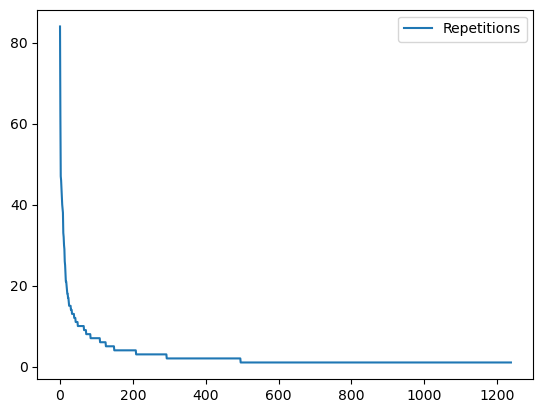

In [17]:
#example of plotting the whole chart (not good, does not give any insights):
dfNC.plot(y="Repetitions")

# Abstract

The findings show pretty much nothing as the words are specific, what is needed is a bar or pie chart with X labels represented as their proper values 

<Axes: title={'center': 'Top 20 Most Used Words in Fighting Game Titles'}, xlabel='Words'>

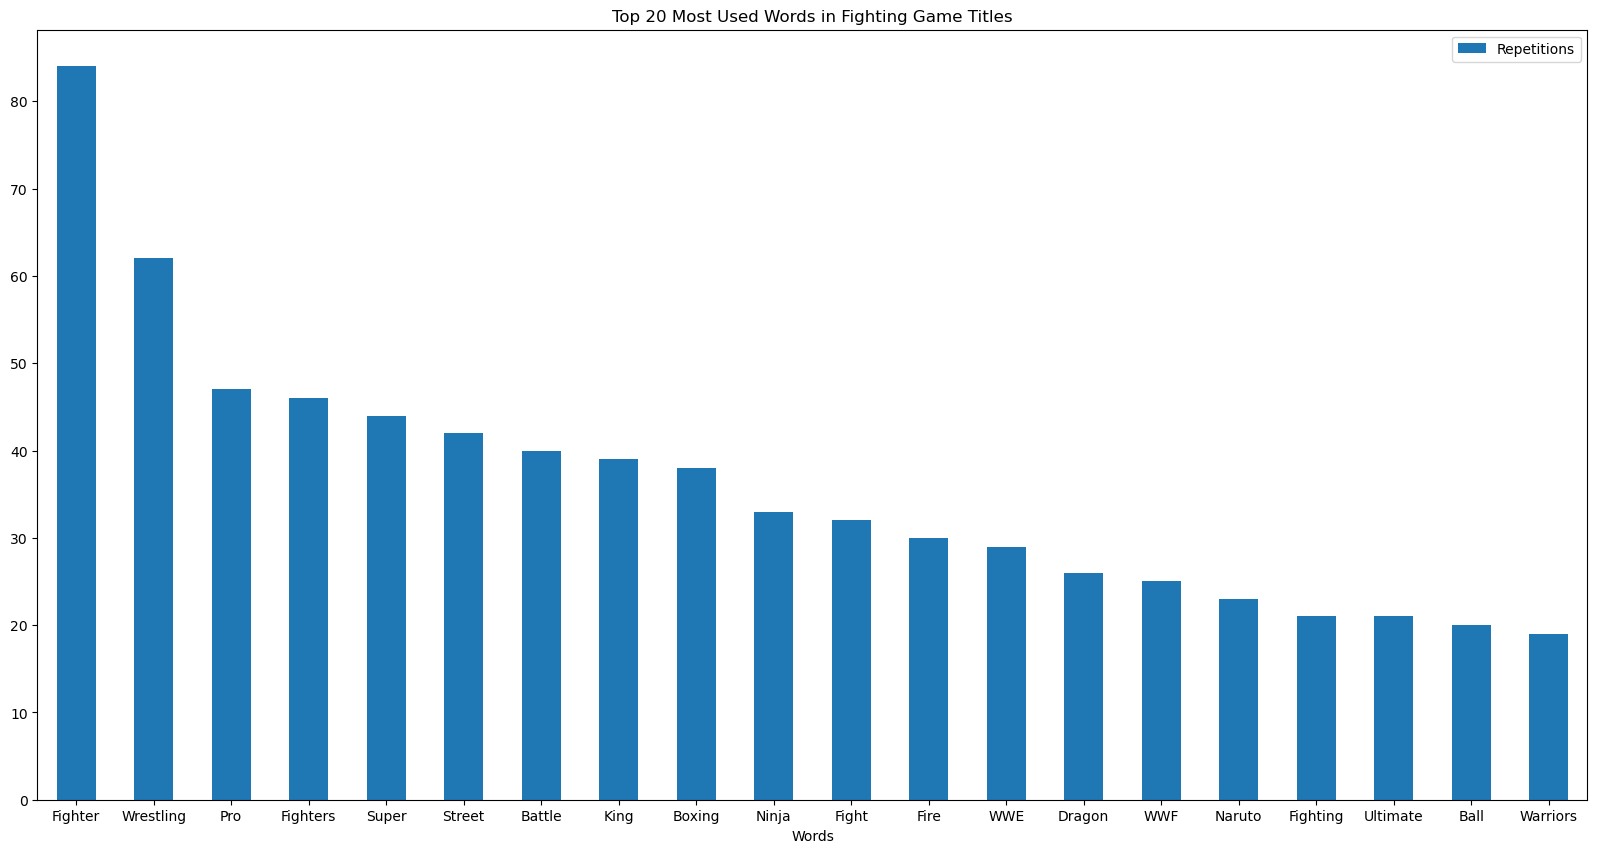

In [18]:
#plotting top 20 words instead
dfNC.iloc[0:20].plot.bar(x='Words',y='Repetitions', rot = 0, figsize = (20,10), title = "Top 20 Most Used Words in Fighting Game Titles")

# Abstract

The bar chart with labeled X axes can show the findings more accurately and allow insights to be drawn better. 

Findings:
- Unsurprisingly, the words "Fighter" and "Fighters" are amongst the top 5 most used words in game title names
- Surprisingly, placed at second place is "Wrestling". "WWE" sits at number 13 and "WWF" at 15. This shows a great presence of games from the professional wrestling subgenre.
- Furthermore, "Pro" at number 3 and "Fire" at number 12 may indicate that a great number of pro-wrestling games are from the "Fire Pro Wrestling" franchise. It has a great fanbase in Japan but outside of the domestic market it has garnered a cult following. The sheer number of games in the series is surprising.
- The mention of "Boxing" at number 9 is interesting. The last AAA attempt at a boxing game was the "Fight Night" series which rarely if ever use the word "Boxing" in their titles. This may point to a great presence of boxing games from the 80's, 90's and early 2000's
- Near the end of the top 20 sit the words "Dragon", "Ball" and "Naruto". Apart from one 2.5D fighter "Dragon Ball FighterZ" by ArcSys, the Dragon Ball and Naruto series are dominated by simpler more casual-oriented 3D arena fighting games. The number of games from these 2 series only show a big presence of the subgenre.

Takeaways:
- The word Fighter greatly outnumbers all others
- Great presence of pro-wrestling oriented words
- Some names of others licensed franchises dominate the rest of the word pool
- Words that allude to the sports subgenre have a great presence as well

In [19]:
#plotting bottom 20 words leads to no significant results as 20+ words are repeated once
#Remove comments to see the bar chart
#dfNC.iloc[len(dfNC)-20:len(dfNC)].plot.bar(x='Words',y='Repetitions', rot = 0, figsize = (20,10), title = "Top 20 Least Used Words in Fighting Game Titles")

<Axes: title={'center': 'Repetition Count For Words Ascending'}, xlabel='Repetition Count'>

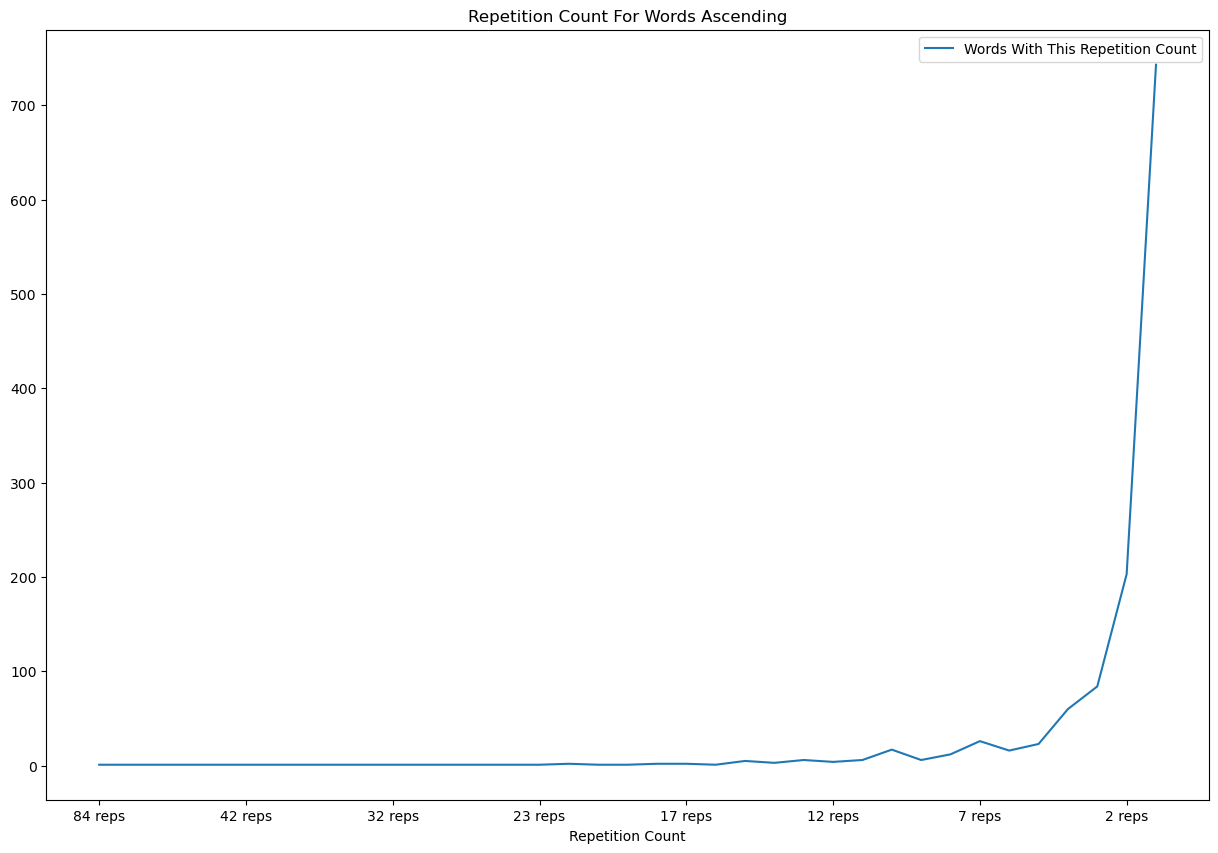

In [20]:
#plotting how many words are repeated X times
#repTracker dict: key = word repeated X times, value = number of words
repTracker = {}

for reps in wordCounter.values():
    key = str(reps) + ' reps'
    if key in repTracker:
        repTracker[key]+=1
    else:
        repTracker[key]=1

#Remove Comments for testing purposes
# print(repTracker)

dataTR = {
    'Repetition Count': list(repTracker.keys()),
    'Words With This Repetition Count': list(repTracker.values())
}
#Remove Comments for testing purposes
# print(dataTR)

dfTR = pd.DataFrame(dataTR)
#Remove Comments for testing purposes
# print(dfTR)
#graph chart is used as this is looking at trends and not comparing specifics
dfTR.plot(x='Repetition Count',title='Repetition Count For Words Ascending', figsize = (15,10))

# Abstract

There are some insights to be drawn from looking at how likely words are to have repetitions.
Takeaways:
- As "connecting" words and prefixes such as "a", "an", "the" are removed, this graph shows only specific nouns, adjectives, adverbs and verbs.
- Words with high repetition counts (above 10) make up a significantly tiny amount of the list.
- Words with 1-3 repetitions are several times more prevalent. Having numbers in the hundreds.

# Data Analysis - Publisher Relevance - Representing Data

This will show publishers and how many entries (games) they have released in the genre. A bar chart will be used as it is competitive

In [21]:
#sorting publisherDict by value descending
#lambda gotten from source: 
#https://miguendes.me/how-to-sort-a-dict-in-descending-order-by-value-with-python#heading-using-lambda-to-sort-the-dictionary-in-descending-order


sortLambda = lambda kVP: kVP[1]
#sorts by values descending as reverse=True
publisherDict = dict(sorted(publisherDict.items(), key = sortLambda, reverse=True))

#Remove Comments for testing purposes
# print(publisherDict)

In [22]:
#creating dataframe from publishers dictionary

dataPD = {
    'Publisher': list(publisherDict.keys()),
    'Games Published': list(publisherDict.values())
}

dfPD = pd.DataFrame(dataPD)
#Remove Comments for testing purposes
# print(dfPD)

<Axes: title={'center': 'Publisher Relevance Descending'}, xlabel='Publisher'>

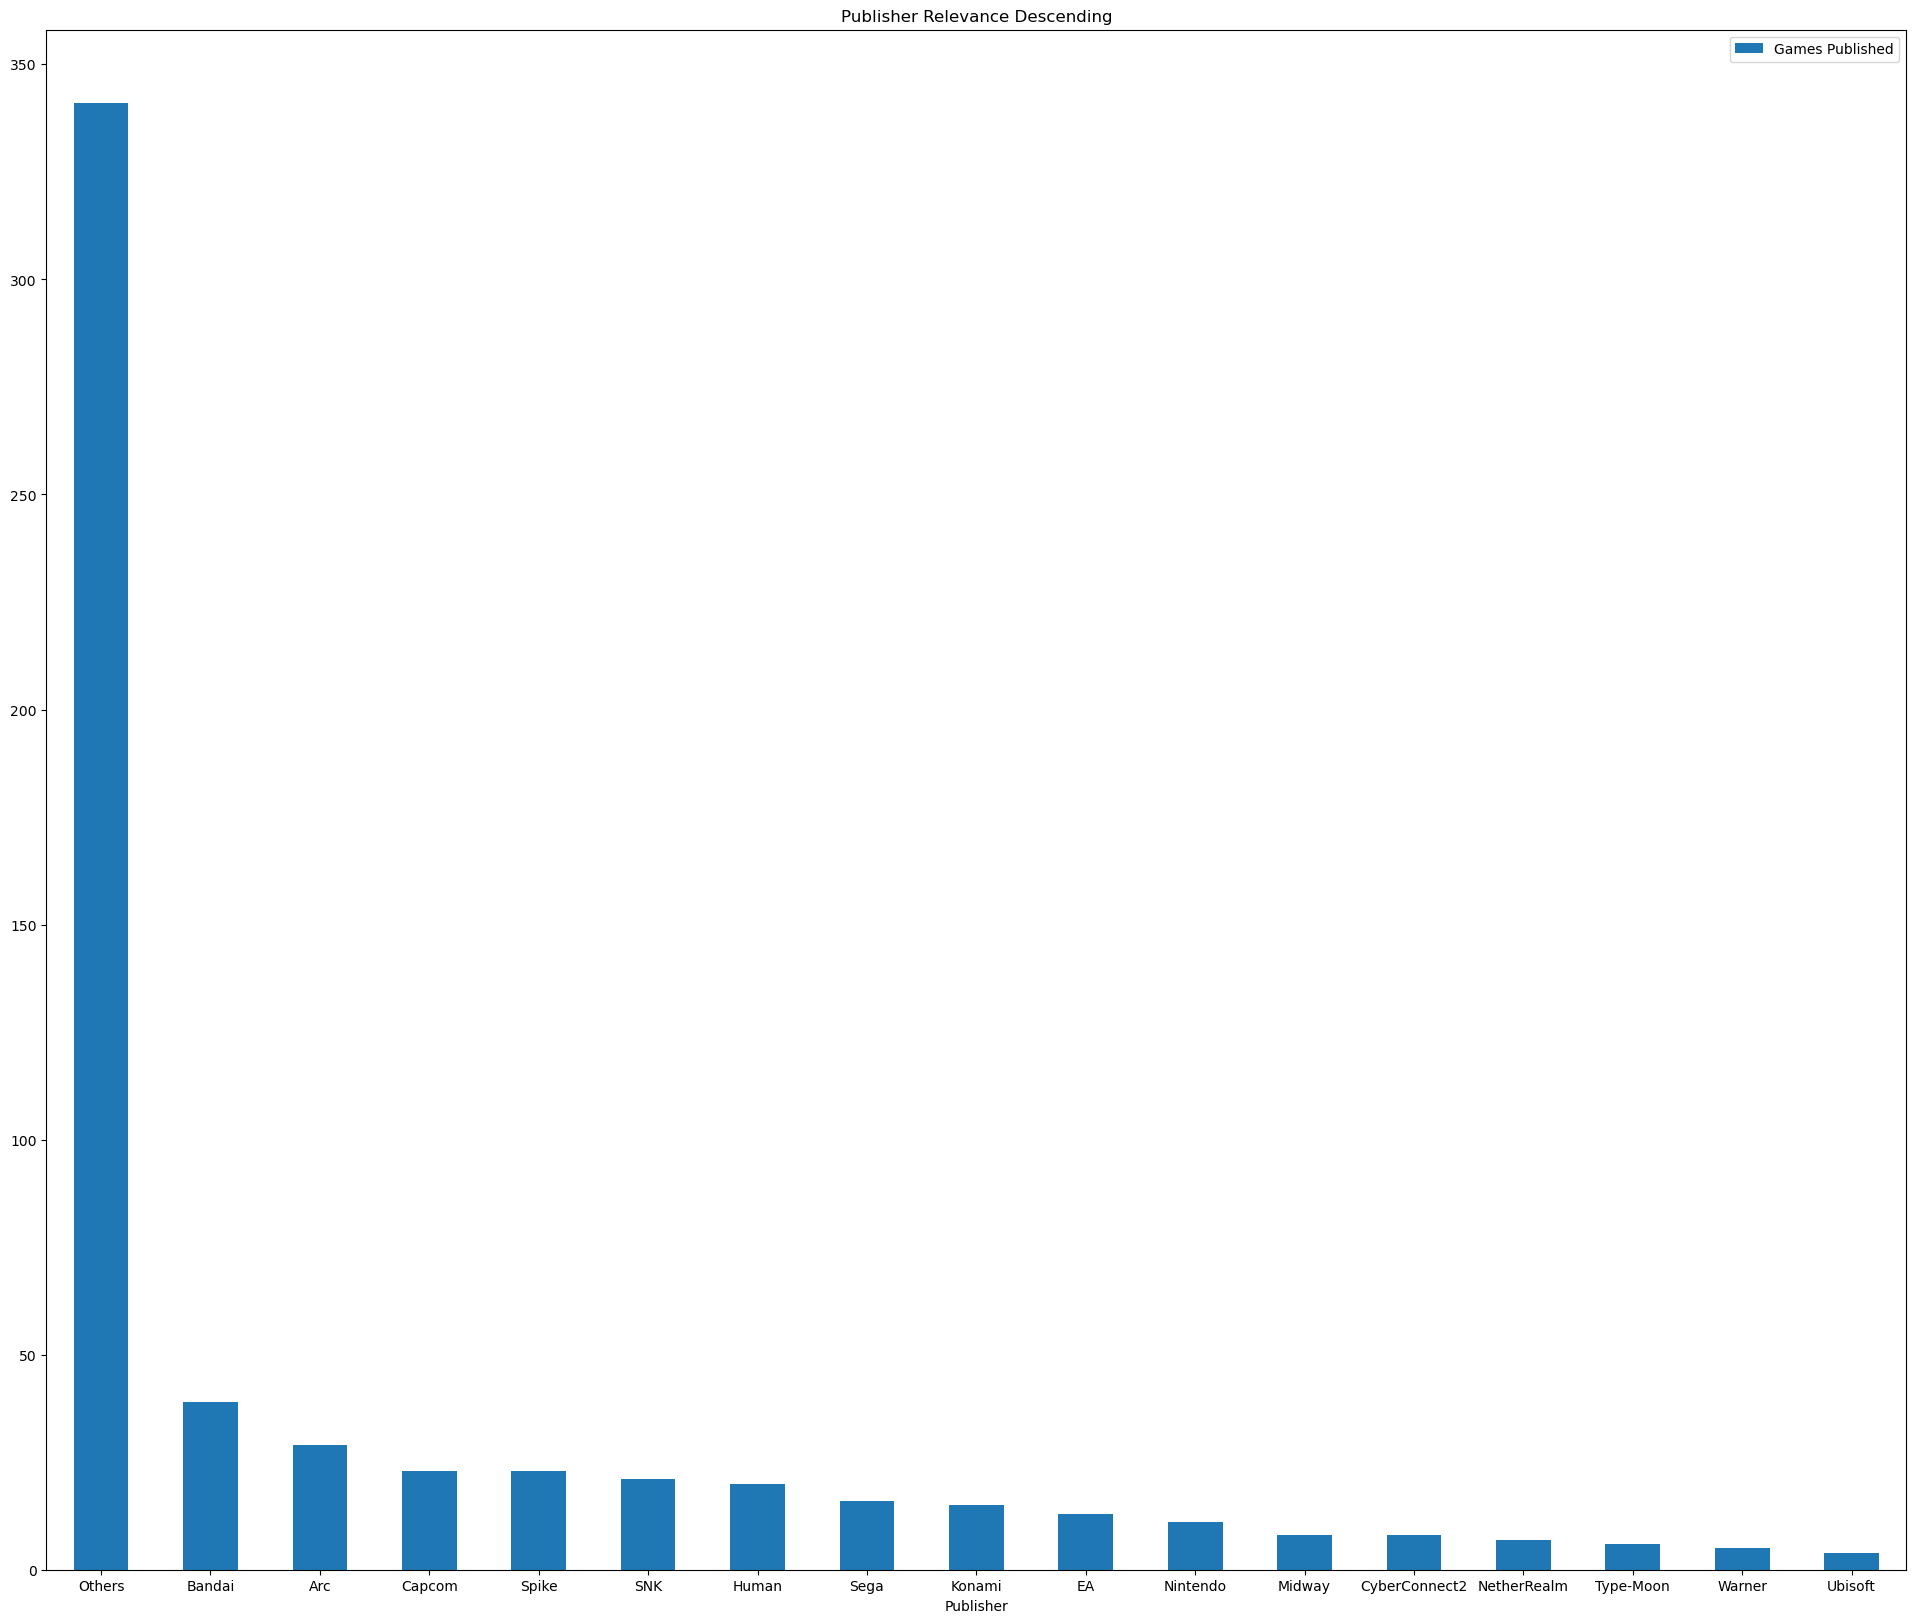

In [23]:
#plotting bar chart
dfPD.plot.bar(rot=0,x='Publisher',figsize=(24,20), title = 'Publisher Relevance Descending')

# Abstract

Findings:
- "Others" mark publishers with less of an impact, what is surprising is that their contributions outnumber big studios numerous times.
    - This may be attributed to the fact that an abundance of AAA studios started appearing during the middle of the 2000's whislt a great majoirty of fighting game titles were made during the 90's with the explosive success of Street Fighter II kickstarting the genre
        - This is further supported by the fact that making games in the 80's and early 90's that were commercially viable was significantly less expensive and small studios had an advantage
- Bandai Namco is ranked the biggest major publisher. This is unsurprising as they have stakes in many subgenres. From owning the Tekken  and Soul Calibur franchise, they have a big share in the competitive 3D subgenre, whlist they are also responsible for publishing many arena fighters as well.
- A great surprise was seeing Arc System Works in 2nd place. They are enjoying a new spot in the limelight for their great 2D and 2.5D anime fighters (known to the community as "air-dashers"), yet it is easy to forget that they are a company founded in 1988. Still, their amount of published games is a great surprise as the subgenre they focus on is notoriously complex to develop and balance.
- Capcom at 3rd place is still unsurprising, they own the Street Fighter franchise and that series has an incredible roster of entries. My initial expectations were to see them in the top 3.
- Spike is interesting at 4th place. They were defunct in 2012, yet were an interesting company. Their business model was to both develop and publish video games and they financed many small projects.
- SNK and Human are also unsurprising additions to the top, they are representative of a large roster of 90s games, especially due to the arcade scene at the time.
- Sega having morre entries than both Konami, EA and Nintendo came as a surprise. They used to develop their own line of game consoles yet with the unsuccessful run of the Dreamcast, they resorted to only publishing games. As a company that lost in direct competiton with Nintendo (keeping in mind Nintendo used to have a policy during the NES and SNES days that it publishes any games for the console regardless of the developer), it is quite interesting to see them rank above them.
- Ubisoft being in the last place was not an upset, they have 1 or 2 niché experimental titles that fall into the fighting game genre but that is not their main focus.

Takeaways:
- Surprisingly, lesser-known studios dominate the market when it comes to raw numbers of published games.
- Followed by big Japanese studios that mix modern and legacy publishers
- Followed by Western and indie studios

# Data Analysis - Series Entries - Representing Data

Data will once again be represented as a bar chart as data is competitive 

In [24]:
#sorting seriesDict by value descending
#lambda gotten from source: 
#https://miguendes.me/how-to-sort-a-dict-in-descending-order-by-value-with-python#heading-using-lambda-to-sort-the-dictionary-in-descending-order


sortLambda = lambda kVP: kVP[1]
#sorts by values descending as reverse=True
seriesDict = dict(sorted(seriesDict.items(), key = sortLambda, reverse=True))

#Remove Comments for testing purposes
# print(seriesDict)

In [25]:
#building seriesDict dataframe
dataSD = {
    'Series': list(seriesDict.keys()),
    'Entries': list(seriesDict.values())
}
dfSD = pd.DataFrame(dataSD)

#Remove Comments for testing purposes
# print(dfSD)

<Axes: title={'center': 'Series Entries Descending'}, xlabel='Series'>

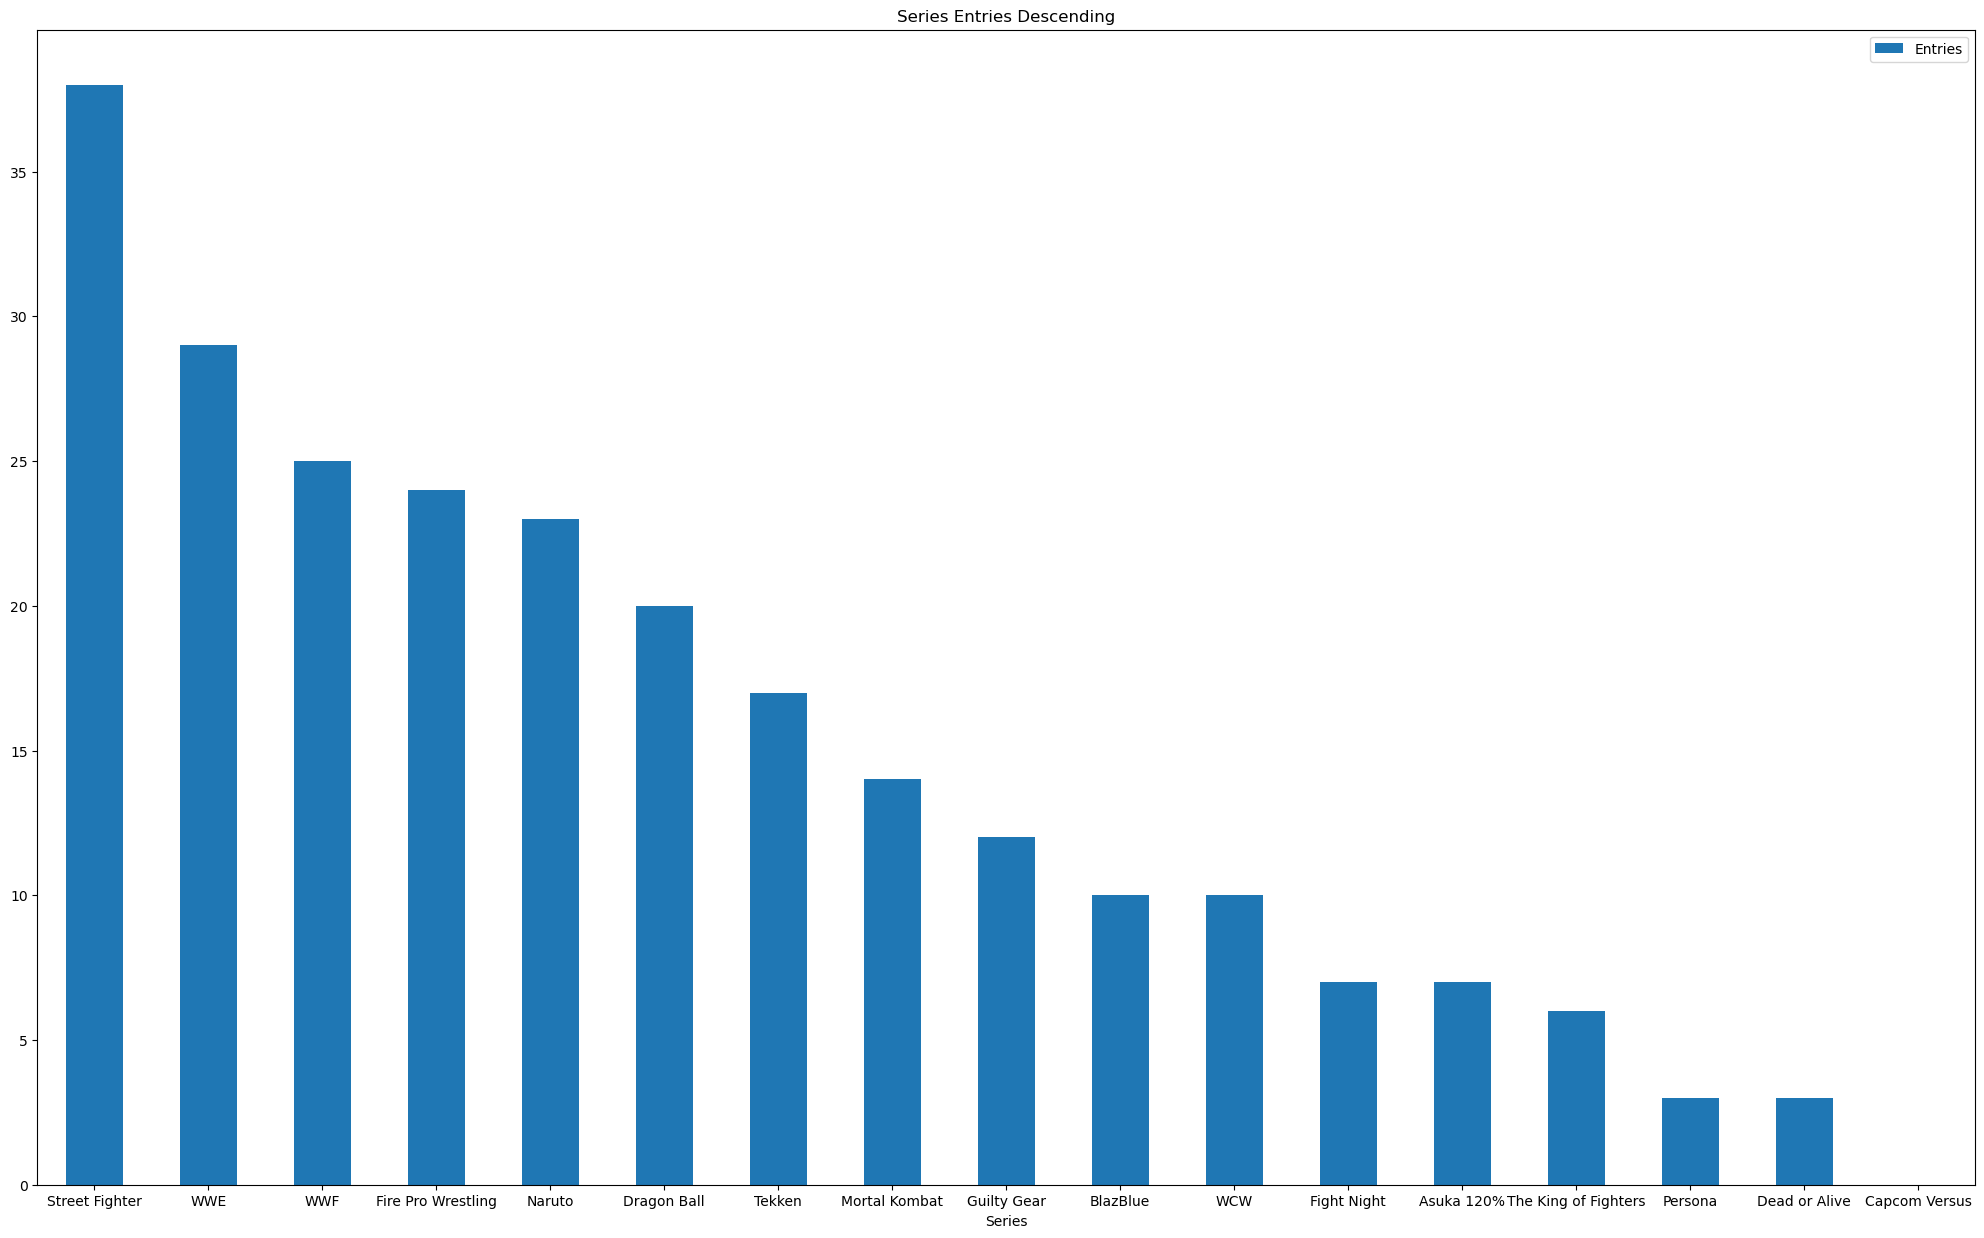

In [26]:
#plotting bar chart
dfSD.plot.bar(x='Series', rot=0, figsize = (25,15),title='Series Entries Descending')

# Abstract

Findings:
- Street Fighter having the most entries was expected. However, WWE, WWF and Fire Pro Wrestling occupying spots 2-4 was quite surprising. Naruto and Dragon Ball occupying spots 5 and 6, respectfully, are an interesting sign as well. The top 6 is mostly occupied by games aimed at a more casual audience. This definitely makes sense as they are:
    - More easy to approach for beginners
    - Are tied to already licensed brands, therefore, they bring customers outside of the niché
    - Casual games are easier to develop and cost less money to make
- Tekken at number 7 was expected. The 3D subgenre is underrepresented due to how complex it is.
- Guilty Gear and BlazBlue having more entries than Fight Night, The King of Fighters, Persona and Dead or Alive was surprising as well.

Takeaways:
- Street Fighter is the most popoular series as a classical 2D fighter,
- Followed by pro-wrestling games, followed by arena fighters. More casual-oriented games are well-published.
- Followed by every other series not called Street Fighter, representing the more niché competitive entries.

# Feedback and Reflection
This section covers the personal thoughts of the author on how they performed their tasks for this midterm assignment.

- Positives
    - Good topic choice: I was incredibly careful as to which topic to choose as it correlates directly to which website to scrape and did extensive research into the TOS of many online websites in order to settle on this topic. Ethically extracting the data needed was my biggest goal for this segment of my work and I believe I reached that milestone with care, planning and diligence.
    - Well-documented report: I was exhaustive and thorough in each part of the report being sure to explain actions and reasons behind them. Where needed, I have also left a short summary of a larger text. I believe I achieved my goals in providing information with purpose and without being needlessly verbose or the other extreme - use shortspeak for everything.
    - Readable Code: My naming conventions are consistent. I settled on using "camelCase" and it is used on all variables I have declared. Code has comments where needed without unnecessary over-explanations or bloat. I have stuck to using clean code principles and relied on functional programming paradigms for this assignment.
    - Responsible referencing: Any amount of borrowed work or external source was referenced.
    - Appropriate data representation: Transforming data to information alludes to representing the data in a manner where it is as objective and comprehensible as possible. I believe my choice of data frame plots was appropriate for their purpose. No amount of data processing was programmed to produce biased outputs.
    - Sticking to the objectives of the report: Each required field was taken into account when completing this assignment.
- Negatives
    - Lack of use of a static input stream such as a CSV: I was unsure whether it would be penalised as the report requirements stated everything used should be in one Jupyter Notebook.
    - Not utilising libraries enough: I have presented custom code for many list and dictionary problem solutions in Python which may have been solved by a single function from a library such as numPy. I am very new to Python and while I am proud of my creative problem-solving, appropriate use of libraries and their functions would definitely make code more compact => more readable.
    - Lack of experience with web-scraping: This is my first attempt at web-scraping outside of the Lab. BS4 is a powerful library and I am sure that my inexperience may have compromised or complicated the extraction process.
- Overall:
    - I am overall proud of my work and believe that as a first larger data analysis project it is a commendable effort.
    - I believe I have improved in the areas I lack due to challenging myself, however, I will further improve by learning various aspects of Python and some mainstream libraries more in-depth.

# End of Report
Thank you for your time taken to read and review my work.